In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from fastai.vision.all import *
import os

In [3]:
path = Path ('dataset/classification_images')

In [4]:
dls = ImageDataLoaders.from_folder(path,
                                   bs=8,
                                   train = "train",
                                   valid = "val",
                                   test="test",
                                   item_tfms=Resize(224))

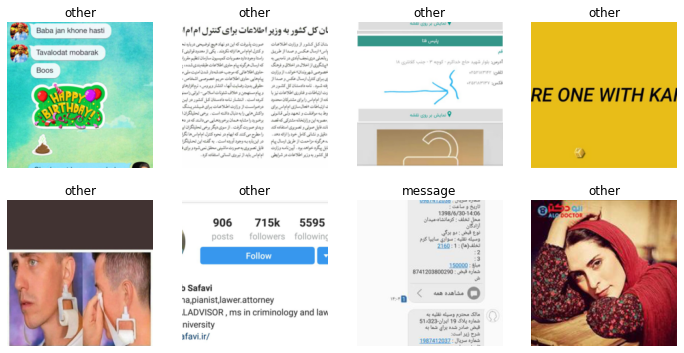

In [5]:
dls.show_batch()

In [25]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

SuggestedLRs(valley=0.0010000000474974513)

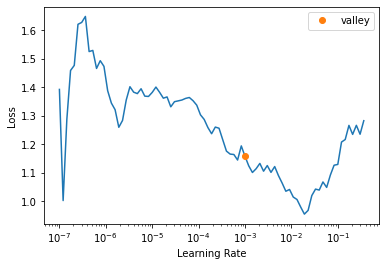

In [7]:
learn.lr_find()

In [26]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.509180,0.258583,0.102740,0.897260,01:18
1,0.334835,0.205614,0.070205,0.929795,01:20
2,0.307840,0.157304,0.059932,0.940068,01:19
3,0.241995,0.148349,0.063356,0.936644,01:18
4,0.260065,0.136814,0.056507,0.943493,01:18


In [8]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.488709,0.323645,0.116438,0.883562,02:15


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.364561,0.217090,0.078767,0.921233,03:21
1,0.215401,0.173744,0.063356,0.936644,03:26
2,0.166568,0.121627,0.037671,0.962329,03:29


In [ ]:
# learn.fine_tune(1)

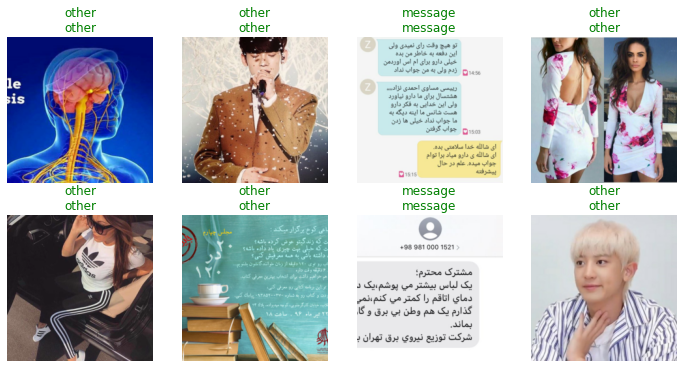

In [9]:
learn.show_results()

In [10]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)

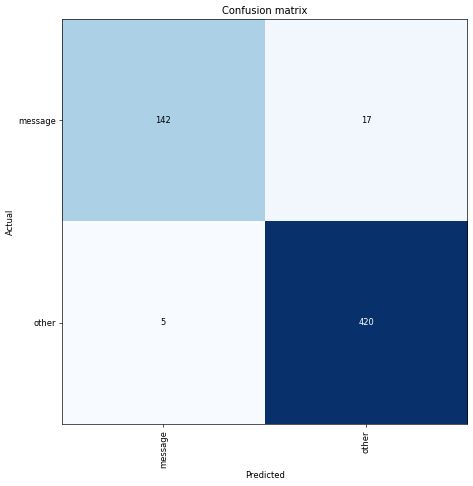

In [11]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

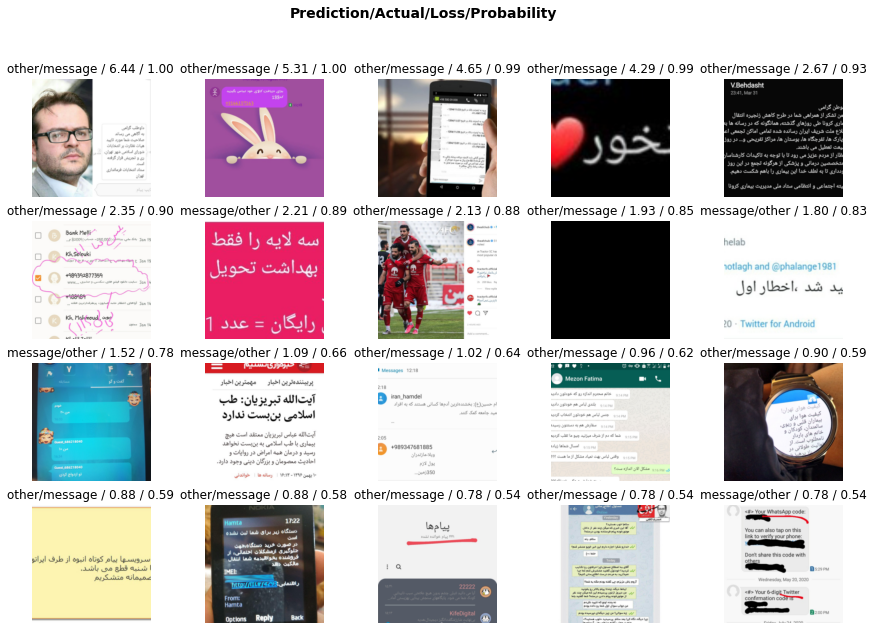

In [12]:
interp.plot_top_losses(20, figsize=(15,10))

In [21]:
learn.path = Path("/home/hue/Codes/samandoon/computer_vision_twitter_media/outputs/")
if not os.path.exists(learn.path):
    os.mkdir(learn.path)

In [22]:
learn.export("fastai_resnet50.pkl")

In [23]:
learn.save("fastai_resnet50")

Path('/home/hue/Codes/samandoon/computer_vision_twitter_media/outputs/models/fastai_resnet50.pth')

In [ ]:
# learn_inf = load_learner(path/'fastai_15000.pkl')